In [1]:
cd '/content/drive/My Drive/machine_learning_cl/MovieReview/'

/content/drive/My Drive/machine_learning_cl/MovieReview


In [2]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []
stemmer = WordNetLemmatizer()

In [ ]:
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [ ]:
import pickle

with open('documents.p', 'wb') as file:
    pickle.dump(documents, file)
    pickle.dump(y, file)

In [3]:
import pickle

with open('documents.p', 'rb') as file:    # weights.p 파일을 바이너리 읽기 모드(rb)로 열기
    documents = pickle.load(file)
    y = pickle.load(file)

사이킷

In [6]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

keras

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
max_words = 500 # 실습에 사용할 단어의 최대 개수
num_classes = 1 # 레이블의 수

def prepare_data(data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(data)
    data = t.texts_to_matrix(data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return data, t.index_word
    
data, index_to_word = prepare_data(documents, 'binary') 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, shuffle=False)

word2vec

In [ ]:
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

# tokenization
tokens = []
stop_words = set(stopwords.words('english')) 

for row in documents:
  word_tokens = word_tokenize(row)
  result =[word for word in word_tokens if not word in stop_words]
  tokens.append(result)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Word2Vec embedding
from gensim.models import Word2Vec
embedding_model = Word2Vec(tokens, size=1, window = 2, min_count=50, workers=4, iter=100, sg=1)

In [ ]:
# check embedding result
print(embedding_model.most_similar(positive=["movie"], topn=30))

[('constant', 1.0), ('featuring', 1.0), ('send', 1.0), ('mob', 1.0), ('100', 1.0), ('serve', 1.0), ('hint', 1.0), ('bored', 1.0), ('likable', 1.0), ('position', 1.0), ('routine', 1.0), ('hidden', 1.0), ('enemy', 1.0), ('ups', 1.0), ('goofy', 1.0), ('patch', 1.0), ('jedi', 1.0), ('current', 1.0), ('mulan', 1.0), ('ford', 1.0), ('faith', 1.0), ('professor', 1.0), ('hurt', 1.0), ('nomination', 1.0), ('wave', 1.0), ('humour', 1.0), ('succeeds', 1.0), ('pilot', 1.0), ('study', 1.0), ('rob', 1.0)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
embedding_model.save('Word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
 def Convert2Vec(model_name, doc):  ## Convert corpus into vectors
        word_vec = []
        model = Word2Vec.load(model_name)
        for sent in doc:
            sub = []
            length = len(sent)
            for i in range(58): 
              if(i < length):
                word = sent[i]
                if (word in model.wv.vocab):
                  sub.append(model.wv[word])
                else :
                  sub.append(np.random.rand(1)) ## used for OOV words
              else:
                  sub.append(0.0) 
            word_vec.append(sub)
        return np.array(word_vec)

In [ ]:
entire = Convert2Vec("./Word2vec.model",tokens)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(entire, y, test_size=0.3, shuffle=False)

In [ ]:
len(X_test)

601

##Split data to (train images, train labels) and (test images, test labels)

In [4]:
import numpy as np
train_testload = np.load('./train_test.npz', allow_pickle=True)
X_train= train_testload['X_train']
X_test= train_testload['X_test']
y_train= train_testload['y_train']
y_test= train_testload['y_test']

In [7]:
np.savez('train_test', X_train = X_train, X_test = X_test, y_train=y_train, y_test=y_test)

In [6]:
# create label for one hot encoding
def label(num):
  label = np.zeros(2, dtype=int)
  label[num] = 1
  return label

def labels():
  labels = np.zeros((2,2), dtype = int)
  for i in range(2):
    labels[i, :] = label(i)
  return labels

l = labels() #10X10

In [7]:
#이미지 1개
from numba import jit
@jit(nopython=True, parallel=True)
def J(H, label): # 10*1 10*1
  cost = (-label)*(np.log(H)) 
  - (1-label)*(np.log(1-H))
  SUM = np.sum(cost)
  return SUM

from numba import jit
@jit(nopython=True)
def zeros(length):
    return np.zeros(length, np.float64)  # np.float64 instead of np.float

@jit(nopython=True)
def zerosShape(row, col):
    return np.zeros((row, col), np.float64)  # np.float64 instead of np.float

@jit(nopython=True)
def zeros(length):
    return np.zeros(length, np.float64)  # np.float64 instead of np.float

@jit(nopython=True)
def empty(size):
    return np.empty(size, np.float64)

@jit(nopython=True, parallel=True)
def sigma(X):
    return 1.0/(1.0+(np.exp(-X)))

@jit(nopython=True, parallel=True)
def square(X):
    return np.square(X)

@jit(nopython=True, parallel=True)
def sum_square(X):
  acc = 0
  for val in X:
    val2 = np.square(val)
    acc += np.sum(val2)
  return acc

@jit
def Savez(save_info1, save_info2, save_info3):
  np.savez("file_info", info1=save_info1, info2=save_info2, info3=save_info3) 

@jit(nopython=True, parallel=True)
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

train variable 초기화 혹은 불러오기

In [24]:
accuracy_array_ = zeros(500)
cost_array_ = zeros(500)

In [ ]:
accuracy_array_[:training_itr] = accuracy_array[:training_itr]
cost_array_[:training_itr] = cost_array[:training_itr]

In [25]:
## NN architecture
numX = 1500
numY = 784
numZ = 196
numP = 49
numH = 2

weights 초기화 혹은 불러오기

In [26]:
import numpy as np
#가장 처음 한 번만 실행
# initializing model parameters

np.random.seed(seed=100) #랜덤값 고정

U1d = np.random.normal(size=numY*(numX+1))
V1d = np.random.normal(size=numZ*(numY+1))
W1d = np.random.normal(size=numP*(numZ+1))
Q1d = np.random.normal(size=numH*(numP+1))
past_itr = 0


In [ ]:
weights_load = np.load("./file_info.npz")
U1d = weights_load['info1'][:,past_itr]
V1d = weights_load['info2'][:,past_itr]
W1d = weights_load['info3'][:,past_itr]
Q1d = weights_load['info4'][:,past_itr]

train model

In [27]:
from numba import njit
itr = 160
past_itr = 0
save_info1 = zerosShape(numY*(numX+1), itr)
save_info2 = zerosShape(numZ*(numY+1), itr)
save_info3 = zerosShape(numP*(numZ+1), itr)
save_info4 = zerosShape(numH*(numP+1), itr)

##model
@jit(nopython=False, parallel=True )
def model(U1d, V1d, W1d, Q1d, past_itr, itr, numvectors, accuracy_array, cost_array, X_train, y_train ):
  #gradient descent
  predicted_label = zeros(numvectors)
  lamb = 10
  ln_rate = 0.01
  
  for j in range(itr):#iteration 
    j = past_itr + j  #cost와 accuracy array의 index
    errors = 0 
    ifzero = 1 

    if (j==0):
      ifzero = 0
    if (j%100==0):
      ln_rate = ln_rate * (0.1)
    print("iteration:", j+1)
    for i in range(numvectors):

      ## resizing 
      U = U1d.reshape(numX+1, numY).copy()
      V = V1d.reshape(numY+1, numZ).copy()
      W = W1d.reshape(numZ+1, numP).copy()
      Q = Q1d.reshape(numP+1, numH).copy()

      #print(i)
      X  = empty((numX, 1))
      xf = X_train[i].flatten()
      vec = np.ascontiguousarray(xf)
      X = vec.reshape(((numX), 1) )
      l_indx = y_train[i] #int 
      Xt_nob = np.transpose(X)

      X0 = np.array([1]) #bias
      X_b = np.append(vec, X0)
      Xt = X_b.reshape(1,numX+1) 
      #  print("Xt : ", Xt)
      Y = np.dot(Xt, U)
      Y_tilda_nob = sigma(Y)

      Y0 = np.array([1])
      vec_y = np.ascontiguousarray(Y_tilda_nob[0, :])
      Y_tilda_b = np.append(vec_y, Y0)
      Y_tilda = Y_tilda_b.reshape(1,numY+1)
      Z = np.dot(Y_tilda, V)
      Z_tilda_nob = sigma(Z)

      Z0 = np.array([1])
      vec_z = np.ascontiguousarray(Z_tilda_nob[0, :])
      Z_tilda_b = np.append(vec_z, Z0)
      Z_tilda = Z_tilda_b.reshape(1,numZ+1)
      P = np.dot(Z_tilda, W) 
      P_tilda_nob = sigma(P)

      P0 = np.array([1])
      vec_p = np.ascontiguousarray(P_tilda_nob[0, :])
      P_tilda_b =  np.append(vec_p, P0)
      P_tilda = P_tilda_b.reshape(1,numP+1)
      H = np.dot(P_tilda, Q)
      H_tilda = sigma(H)

      ##error
      onehotencd = l[l_indx]

      ##error
      error = J(H_tilda, onehotencd)
      result = softmax(H_tilda)
      predicted_label[i] = np.argmax(result)
      errors += error

      ##back propagation
      ## NN architecture

      ## Q - 업데이트 49 X 10 - no bias 50*10 #Ztilda는 49개의 w 업데이트의 과정에서 고정
      P_tilda_nob = P_tilda_nob.reshape(numP,1)
      redundant = (H_tilda - onehotencd).reshape(1,numH ) # 1 X 2
      if(j== 0): 
        Q[:numP, :] = Q[:numP, :]- ln_rate * np.dot(P_tilda_nob, redundant)  ## 49 X 2
      Q[:numP, :] = Q[:numP, :]*(1-ln_rate*lamb/numvectors)- ln_rate * np.dot(P_tilda_nob, redundant) # 49x10
      #print(W.shape)

      ## W - 업데이트 
      p = sigma(P)*(1-sigma(P)) 
      Z_tilda_nob = Z_tilda_nob.reshape(numZ,1)
      q = np.ascontiguousarray(Q[:numP, :])
      a = np.dot(redundant, q.reshape(numH,numP))  # 1X2 2X49
      b = p
      redundant2 = (a*b) # 1X49
      if(j== 0):
        W[:numZ, :] = (W[:numZ, :] - ln_rate * np.dot(Z_tilda_nob, redundant2))              
      W[:numZ, :] = (W[:numZ, :]*(1-ln_rate*lamb/numvectors) - ln_rate * np.dot(Z_tilda_nob, redundant2))                     #196X49
      #print(V.shape)

      ## V - 업데이트 196X49
      z = sigma(Z)*(1-sigma(Z))
      Y_tilda_nob = Y_tilda_nob.reshape(numY,1)
      w = np.ascontiguousarray(W[:numZ, :])
      a = np.dot(redundant2, w.reshape(numP,numZ))
      b = z
      redundant3 = (a*b) 
      if(j== 0):
        V[:numY, :] = (V[:numY, :] - ln_rate * np.dot(Y_tilda_nob, redundant3))              
      V[:numY, :] = (V[:numY, :]*(1-ln_rate*lamb/numvectors) - ln_rate * np.dot(Y_tilda_nob, redundant3))                     #196X49
      #print(V.shape)
      
      ## U - 업데이트
      y = sigma(Y)*(1-sigma(Y))
      Xt_nob = Xt_nob.reshape(numX,1)
      v =  np.ascontiguousarray(V[:numY, :])
      c = np.dot(redundant3, v.reshape(numZ,numY))
      d = y
      redundant4 = (c*d)          #1x196
      if(j== 0):
        U[:numX, :] = (U[:numX, :] - ln_rate * np.dot(Xt_nob,redundant4))
      U[:numX, :] = (U[:numX, :]*(1-ln_rate*lamb/numvectors) - ln_rate * np.dot(Xt_nob,redundant4))
      #print("U : ", U.shape)

      U1d = U.flatten()
      V1d = V.flatten()
      W1d = W.flatten()
      Q1d = Q.flatten()

    cost = errors/numvectors + ifzero * (lamb/(2*numvectors))*sum_square([vec,vec_y,vec_z,vec_p])
    save_info1[:, j] = U1d 
    save_info2[:, j] = V1d 
    save_info3[:, j] = W1d
    save_info4[:, j] = Q1d
    ## accuracy
    ## check if the prediction is correct
    count = 0
    for real, hypo in zip(y_train, predicted_label):
        if real == hypo:
          count = count + 1
      
    accuracy = count/numvectors
      
    print("cost ", cost)
    print("accuracy ", accuracy)
    accuracy_array[j] = accuracy 
    
    cost_array[j] = cost
  past_itr = j + 1
  np.savez("file_info", info1=save_info1, info2=save_info2, info3=save_info3, info4=save_info4)
  return past_itr,accuracy_array,cost_array,predicted_label
 

In [28]:
training_itr,accuracy_array,cost_array,predicted_label_train=model(U1d, V1d, W1d, Q1d, past_itr, itr, 1401, accuracy_array_, cost_array_, X_train, y_train )

<ipython-input-27-264461ea7e20>:10: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "model" failed type inference due to: Invalid use of Function(<built-in function setitem>) with argument(s) of type(s): (readonly array(float64, 2d, C), Tuple(slice<a:b>, int64), array(float64, 1d, C))
 * parameterized
In definition 0:
    All templates rejected with literals.
In definition 1:
    All templates rejected without literals.
In definition 2:
    All templates rejected with literals.
In definition 3:
    All templates rejected without literals.
In definition 4:
    All templates rejected with literals.
In definition 5:
    All templates rejected without literals.
In definition 6:
    All templates rejected with literals.
In definition 7:
    All templates rejected without literals.
In definition 8:
    TypeError: Cannot modify value of type readonly array(float64, 2d, C)
    raised from /usr/local/lib/python3.6/dist-packages/numba/typing/ar

iteration: 1
cost  1.2112560526538203
accuracy  0.476802284082798
iteration: 2
cost  2.1602289501713434
accuracy  0.4782298358315489
iteration: 3
cost  2.143708394385645
accuracy  0.483226266952177
iteration: 4
cost  2.1250377638460924
accuracy  0.48394004282655245
iteration: 5
cost  2.1029327748816984
accuracy  0.483226266952177
iteration: 6
cost  2.081256337661724
accuracy  0.48679514632405424
iteration: 7
cost  2.0641001039392024
accuracy  0.4853675945753034
iteration: 8
cost  2.051791263026944
accuracy  0.4853675945753034
iteration: 9
cost  2.0439665522244805
accuracy  0.489650249821556
iteration: 10
cost  2.0411252408577423
accuracy  0.4875089221984297
iteration: 11
cost  2.0432778245161156
accuracy  0.48394004282655245
iteration: 12
cost  2.0470329671955736
accuracy  0.483226266952177
iteration: 13
cost  2.043261298755192
accuracy  0.4925053533190578
iteration: 14
cost  2.027285242891446
accuracy  0.489650249821556
iteration: 15
cost  2.0077593367049773
accuracy  0.48893647394718

In [29]:
with open('train_result.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
  pickle.dump(accuracy_array,file)
  pickle.dump(cost_array,file)
  pickle.dump(predicted_label_train,file)

In [17]:
print(predicted_label_train)

[0. 0. 0. ... 1. 1. 1.]


test model

In [30]:
accuracy_array_t = zeros(500)
cost_array_t = zeros(500)

In [31]:
from numba import njit
itr = 160
past_itr = 0

##model
@jit(nopython=False)
def test_model(itr, numvectors, accuracy_array, cost_array, X_test, y_test ):
  #gradient descent
  predicted_label = zeros(numvectors)
  lamb = 50
  ln_rate = 0.01

  weights_load = np.load("./file_info.npz")
  
  for j in range(itr):  #iteration 
    errors = 0 
    ifzero = 1 

    U1d = weights_load['info1'][:,j]
    V1d = weights_load['info2'][:,j]
    W1d = weights_load['info3'][:,j]
    Q1d = weights_load['info4'][:,j]

    print("iteration:", j+1)
    for i in range(numvectors):

      ## resizing 
      U = U1d.reshape(numX+1, numY).copy()
      V = V1d.reshape(numY+1, numZ).copy()
      W = W1d.reshape(numZ+1, numP).copy()
      Q = Q1d.reshape(numP+1, numH).copy()

      #print(i)
      X  = empty((numX, 1))
      xf = X_test[i].flatten()
      vec = np.ascontiguousarray(xf)
      X = vec.reshape(((numX), 1) )
      l_indx = y_test[i] #int 
      Xt_nob = np.transpose(X)

      X0 = np.array([1]) #bias
      X_b = np.append(vec, X0)
      Xt = X_b.reshape(1,numX+1) 
      #  print("Xt : ", Xt)
      Y = np.dot(Xt, U)
      Y_tilda_nob = sigma(Y)

      Y0 = np.array([1])
      vec_y = np.ascontiguousarray(Y_tilda_nob[0, :])
      Y_tilda_b = np.append(vec_y, Y0)
      Y_tilda = Y_tilda_b.reshape(1,numY+1)
      Z = np.dot(Y_tilda, V)
      Z_tilda_nob = sigma(Z)

      Z0 = np.array([1])
      vec_z = np.ascontiguousarray(Z_tilda_nob[0, :])
      Z_tilda_b = np.append(vec_z, Z0)
      Z_tilda = Z_tilda_b.reshape(1,numZ+1)
      P = np.dot(Z_tilda, W) 
      P_tilda_nob = sigma(P)

      P0 = np.array([1])
      vec_p = np.ascontiguousarray(P_tilda_nob[0, :])
      P_tilda_b =  np.append(vec_p, P0)
      P_tilda = P_tilda_b.reshape(1,numP+1)
      H = np.dot(P_tilda, Q)
      H_tilda = sigma(H)

      ##error
      onehotencd = l[l_indx]

      ##error
      error = J(H_tilda, onehotencd)
      result = softmax(H_tilda)
      predicted_label[i] = np.argmax(result)
      errors += error


    cost = errors/numvectors + ifzero * (lamb/(2*numvectors))*sum_square([vec,vec_y,vec_z])

    ## accuracy
    ## check if the prediction is correct
    count = 0
    for real, hypo in zip(y_train, predicted_label):
        if real == hypo:
          count = count + 1
      
    accuracy = count/numvectors
      
    print("cost ", cost)
    print("accuracy ", accuracy)
    accuracy_array[j] = accuracy 
    
    cost_array[j] = cost
  past_itr = j + 1
  #np.savez("file_info", info1=save_info1, info2=save_info2, info3=save_info3)
  return accuracy_array,cost_array,predicted_label
 

In [ ]:
accuracy_array_t,cost_array_t,predicted_label_test=test_model(itr ,601, accuracy_array_t, cost_array_t, X_test, y_test )

<ipython-input-31-475cd3442936>:6: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "test_model" failed type inference due to: Use of unsupported NumPy function 'numpy.load' or unsupported use of the function.

File "<ipython-input-31-475cd3442936>", line 13:
def test_model(itr, numvectors, accuracy_array, cost_array, X_test, y_test ):
    <source elided>

  weights_load = np.load("./file_info.npz")
  ^

[1] During: typing of get attribute at <ipython-input-31-475cd3442936> (13)

File "<ipython-input-31-475cd3442936>", line 13:
def test_model(itr, numvectors, accuracy_array, cost_array, X_test, y_test ):
    <source elided>

  weights_load = np.load("./file_info.npz")
  ^

  @jit(nopython=False)
<ipython-input-31-475cd3442936>:6: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "test_model" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedL

iteration: 1
cost  14.93032257788531
accuracy  0.5324459234608985
iteration: 2
cost  14.90277909793739
accuracy  0.5207986688851913
iteration: 3
cost  14.886378202330585
accuracy  0.5307820299500832
iteration: 4
cost  14.872258765063876
accuracy  0.5291181364392679
iteration: 5
cost  14.855621812158743
accuracy  0.5141430948419301
iteration: 6
cost  14.83997800709951
accuracy  0.5141430948419301
iteration: 7
cost  14.826420729307994
accuracy  0.5207986688851913
iteration: 8
cost  14.813693181551459
accuracy  0.502495840266223
iteration: 9
cost  14.80113570114402
accuracy  0.5041597337770383
iteration: 10
cost  14.788378573864499
accuracy  0.5041597337770383
iteration: 11
cost  14.774975007158632
accuracy  0.5058236272878536
iteration: 12
cost  14.759592854570867
accuracy  0.502495840266223
iteration: 13
cost  14.736452472911553
accuracy  0.5091514143094842
iteration: 14
cost  14.704301298672876
accuracy  0.5041597337770383
iteration: 15
cost  14.671672877141475
accuracy  0.499168053244

In [ ]:
with open('test_result.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
  pickle.dump(accuracy_array_t,file)
  pickle.dump(cost_array_t,file)
  pickle.dump(predicted_label_test,file)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,predicted_label_train))
print(classification_report(y_train,predicted_label_train))
print(accuracy_score(y_train, predicted_label_train))

print(confusion_matrix(y_test,predicted_label_test))
print(classification_report(y_test,predicted_label_test))
print(accuracy_score(y_test, predicted_label_test))


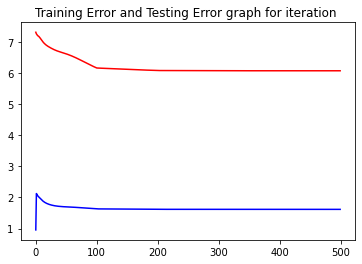

In [ ]:
import matplotlib.pyplot as plt

#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error and Testing Error graph for iteration ")
plt.plot(range(500), np.array(cost_array), color = 'blue' )
plt.plot(range(500), np.array(cost_array_t), color = 'red' )

plt.show()

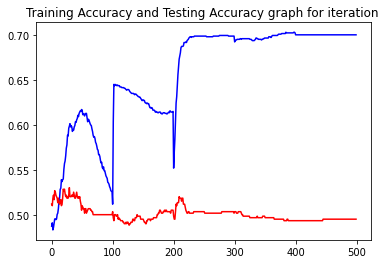

In [ ]:
import matplotlib.pyplot as plt

#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Accuracy and Testing Accuracy graph for iteration ")
plt.plot(range(500), np.array(accuracy_array), color = 'blue' )
plt.plot(range(500), np.array(accuracy_array_t), color = 'red' )

plt.show()